In [68]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

warnings.filterwarnings('ignore')

In [69]:
df_train = pd.read_csv('Train.csv', index_col='Date')
df_test = pd.read_csv('Test.csv', index_col='Date')

In [70]:
df_train.sample(5)

,Place_ID X Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,URSY7IS X 2020-01-16,URSY7IS,60.0,2.0,125.0,9016.29,162,42.566668,75.000003,0.013632,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-14,RW9SZRD X 2020-01-14,RW9SZRD,61.0,42.0,97.0,1239.53,261,19.300001,89.900002,0.011494,...,45.504209,-155.849619,30.301940,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-20,JSXAVKO X 2020-02-20,JSXAVKO,151.0,102.0,181.0,4551.47,48,27.340839,64.800003,0.009537,...,34.086297,-158.131299,31.491960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-04,YJENTFL X 2020-04-04,YJENTFL,26.0,15.0,45.0,880.00,22,8.300000,69.800003,0.004600,...,38.410835,-163.346241,31.715164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-24,IST2SPS X 2020-03-24,IST2SPS,104.0,65.0,158.0,4638.35,387,34.700001,64.000000,0.008370,...,49.585004,-137.239074,36.998218,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df_test.sample(5)

,Place_ID X Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-16,LOSOTRL X 2020-03-16,LOSOTRL,12.381818,72.881821,0.004575,7.181976,0.822670,-2.574501,0.000151,0.000263,...,50.211294,14.786087,54.960984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-10,C178BOO X 2020-03-10,C178BOO,19.918541,93.000000,0.005580,6.326105,2.082937,-1.811465,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-26,PP5RBWO X 2020-03-26,PP5RBWO,9.800000,70.550001,0.002697,0.057825,-2.401733,0.428267,0.000133,0.000180,...,40.972663,-153.548145,48.730452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-04,L09JD4W X 2020-04-04,L09JD4W,7.400000,64.099998,0.003250,4.177362,5.715432,-0.197839,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-12,76RSX1D X 2020-03-12,76RSX1D,19.150001,63.450003,0.009699,20.884454,-1.599288,-0.441440,0.000065,0.000185,...,55.425328,-48.720689,43.441560,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> * From the above cell executed, I can observe some names of compound in the atmosphere; such as <br>
> * ch4 (Methane),  which is also anthropogenically influenced substance in the atmosphere. <br>
> * so2(Sulphur dioxide) which affects human health and air qulaity. It is known that the main origin of so2 is anthropogenic and also from natural sources.<br>
> * hcho (Formaldehyde), Formaldehyde is an intermediate gas in almost all oxidation chains of non-methane volatile organic compounds (NMVOC), leading eventually to CO₂. Sources include vegetation, fires, traffic and industrial. <br>
> * Aerosol Index(AI), A measure of the prevalence of aerosols in the atmosphere. Ideal for tracking the evolution of episodic aerosol plumes from dust outbreaks, volcanic ash, and biomass burning. FYI, Aerosol is a suspension of fine solid or liquid particles in gas Smoke, fog, and mist are aerosols.<br>
> * Cloud; Cloud characteristics including: fraction, height and pressure for base and top, optical depth, and surface albedo.
<br>
> * CO2; Concentrations of Carbon monoxide (CO) and water vapor. CO is an important atmospheric trace gas for our understanding of tropospheric chemistry. Main sources of CO are combustion of fossil fuels, biomass burning, and atmospheric oxidation of methane and other hydrocarbons <br> 
> * O3 (Ozone); Total atmospheric column ozone concentration. Ozone shields the biosphere from solar ultraviolet radiation. In the troposphere, it acts as an efficient cleansing agent, but at high concentrations it also becomes harmful to the health of humans, animals, and vegetation. Ozone is also an important greenhouse-gas contributing to ongoing climate change.<br>
> * NO2 (Nitrogen Dioxide); Total, tropospheric, and stratospheric nitrogen dioxide concentration. Nitrogen dioxide enters the atmosphere as a result of anthropogenic activities such as fossil fuel combustion and biomass burning, as well as natural processes including microbiological processes in soils, wildfires and lightning.<br> 
> * Humidity, temperature, U and v components of wind, precipitable water in the atmosphere.


### Data cleaning.

In [72]:
df_train.shape, df_test.shape

((30557, 81), (16136, 76))

> There are 30557 entries/rows in this dataset and a total of 82 columns in the train dataset whiles there're 16136 and 77 columns in the test dataset. This means that, the columns which are not present in training set but not present in test set should be dropped from the training. This is because those columns(features) will not be available for use in the test set and so it is better to deal with columns which are present in both datasets.

### check for null values and see how best to handle them..


In [73]:
dict(df_test.isna().sum()), dict(df_train.isna().sum())

({'Place_ID X Date': 0,
  'Place_ID': 0,
  'precipitable_water_entire_atmosphere': 0,
  'relative_humidity_2m_above_ground': 0,
  'specific_humidity_2m_above_ground': 0,
  'temperature_2m_above_ground': 0,
  'u_component_of_wind_10m_above_ground': 0,
  'v_component_of_wind_10m_above_ground': 0,
  'L3_NO2_NO2_column_number_density': 1327,
  'L3_NO2_NO2_slant_column_number_density': 1327,
  'L3_NO2_absorbing_aerosol_index': 1327,
  'L3_NO2_cloud_fraction': 1327,
  'L3_NO2_sensor_altitude': 1327,
  'L3_NO2_sensor_azimuth_angle': 1327,
  'L3_NO2_sensor_zenith_angle': 1327,
  'L3_NO2_solar_azimuth_angle': 1327,
  'L3_NO2_solar_zenith_angle': 1327,
  'L3_NO2_stratospheric_NO2_column_number_density': 1327,
  'L3_NO2_tropopause_pressure': 1327,
  'L3_NO2_tropospheric_NO2_column_number_density': 4973,
  'L3_O3_O3_column_number_density': 214,
  'L3_O3_O3_effective_temperature': 214,
  'L3_O3_cloud_fraction': 214,
  'L3_O3_sensor_azimuth_angle': 214,
  'L3_O3_sensor_zenith_angle': 214,
  'L3_O3_s

>As seen above, some of the columns have more than 20,000 null values present..
I'll replace these null values with the mode of their respective columns since most of these columns are a measure of angles, depth and so on. 

>#### Reason behind my choice of replacing these null values with their mode..
>This is because, the angle used by the satellite to meassure these values doesn't really play a role in the amount of air quality available in the atmosphere but the actual measure of the individual sunstances in the atmosphere.

In [74]:
# get the columns that are not present in both datasets and remove them, excluding the target variable i.e. 'target'

cols_drop = [i for i in df_train.columns if i not in df_test.columns]

In [75]:
# the train dataset contains the target variable and so let separate it from the train set since it needs no cleaning..

output = df_train['target']

In [76]:
# Now let's drop the columns not present in both datasets..

df_train.drop(columns=cols_drop, inplace=True)

In [77]:
# check to verify the absence of the removed rows in the train df

assert cols_drop not in list(df_train.columns)

In [78]:
df_train.shape, df_test.shape

((30557, 76), (16136, 76))

In [79]:
len([i for i in df_train.columns if i in df_test.columns])

76

In [80]:
# check to see if same columns exists for both datasets

assert list(df_train.columns) == list(df_test.columns)

> Now both datasets contains same number of columns, meaning all columns in the two datasets are the same
To be able to clean both datasets at once, we need to merge both datasets and do the cleaning and afterwards we split it back into two(2)

In [81]:
# combine the two datasets (df_train, df_test) into 1 for cleaning..

df_full = pd.concat([df_train, df_test])

In [82]:
df_full.shape[0]

46693

In [83]:
df_full.sample(5)

,Place_ID X Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-15,0PP73FZ X 2020-02-15,0PP73FZ,22.500000,81.400002,0.004807,6.022424,1.431443,-3.487593,0.000208,0.000149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-23,EVB4HVG X 2020-02-23,EVB4HVG,22.014285,61.714287,0.008823,19.451127,-0.402907,-0.857679,0.000114,0.000172,...,26.789506,-149.642895,38.780295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-05,U91NAMJ X 2020-02-05,U91NAMJ,4.233334,44.566667,0.002885,7.227970,6.995873,1.456353,0.000075,0.000179,...,47.614411,-154.894131,54.920848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-15,S0WW3QJ X 2020-03-15,S0WW3QJ,6.500000,46.799999,0.002730,5.906793,1.439414,1.644641,0.000108,0.000179,...,46.256929,-170.677710,37.943866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,I6VIR8R X 2020-01-03,I6VIR8R,9.700000,57.299999,0.003120,5.046533,1.110430,3.021892,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46693 entries, 2020-01-02 to 2020-04-04
Data columns (total 76 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      46693 non-null  object 
 1   Place_ID                                             46693 non-null  object 
 2   precipitable_water_entire_atmosphere                 46693 non-null  float64
 3   relative_humidity_2m_above_ground                    46693 non-null  float64
 4   specific_humidity_2m_above_ground                    46693 non-null  float64
 5   temperature_2m_above_ground                          46693 non-null  float64
 6   u_component_of_wind_10m_above_ground                 46693 non-null  float64
 7   v_component_of_wind_10m_above_ground                 46693 non-null  float64
 8   L3_NO2_NO2_column_number_density                     4317

In [85]:
# check for duplicates

df_full.duplicated().sum()

0

> Since most of the columns contains plenty null values, dropping null values will be catastrophic. So let's fill these null values with something..

In [86]:
df_full.median()

precipitable_water_entire_atmosphere    12.000000
relative_humidity_2m_above_ground       74.333333
specific_humidity_2m_above_ground        0.004785
temperature_2m_above_ground              8.091132
u_component_of_wind_10m_above_ground     0.279907
                                          ...    
L3_CH4_aerosol_optical_depth             0.001387
L3_CH4_sensor_azimuth_angle              0.000000
L3_CH4_sensor_zenith_angle               1.146395
L3_CH4_solar_azimuth_angle               0.000000
L3_CH4_solar_zenith_angle               15.281165
Length: 74, dtype: float64

Below, we're going to replace null values with the mean of the column in which they're found..
We could also use the bfill and ffill to handle null values in our datasets..

In [87]:
df_full.fillna(df_full.mean(), inplace=True)

In [88]:
# ensure there are no null values in the dataset

assert False not in [i==0 for i in dict(df_full.isnull().sum()).values()]

In [89]:
# let's check the cleaniness of the dataset..

df_full.sample(20)

,Place_ID X Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-29,3WZQJU8 X 2020-02-29,3WZQJU8,12.100000,71.800003,0.008890,17.491571,-2.104685,2.858953,0.000076,0.000203,...,60.345911,-42.080100,35.309733,930.925552,1730.772778,0.016889,1.021342,13.920663,-69.864277,23.455028
2020-02-22,VPGKX7K X 2020-02-22,VPGKX7K,3.200000,53.125000,0.002524,3.502061,3.552339,-5.242180,0.000131,0.000279,...,59.686517,14.618472,49.078822,930.925552,1730.772778,0.016889,1.021342,13.920663,-69.864277,23.455028
2020-02-06,TSWW4S1 X 2020-02-06,TSWW4S1,5.902220,72.300001,0.002884,0.851902,-0.488947,0.815527,0.000133,0.000231,...,28.769648,-164.868623,65.945517,1853.242040,3113.824299,0.007183,-97.152532,28.688115,-164.882939,65.923159
2020-01-15,LSK9OJP X 2020-01-15,LSK9OJP,20.750001,71.650002,0.011059,18.382120,-0.437485,-2.755220,0.000056,0.000106,...,8.405025,-152.234285,40.248739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-04-04,Z2XYMS4 X 2020-04-04,Z2XYMS4,8.150000,79.000000,0.006085,10.397379,4.375432,-3.652839,0.000000,0.000000,...,35.354684,-123.458625,47.386695,930.925552,1730.772778,0.016889,1.021342,13.920663,-69.864277,23.455028
2020-03-23,GP8V3PO X 2020-03-23,GP8V3PO,21.366667,85.300003,0.007343,11.850000,-0.749197,-2.156824,0.000071,0.000126,...,17.734761,-154.657054,40.990559,930.925552,1730.772778,0.016889,1.021342,13.920663,-69.864277,23.455028
2020-04-04,6O56XQX X 2020-04-04,6O56XQX,9.900001,48.233335,0.005643,16.476268,2.593210,-0.858950,0.000000,0.000000,...,35.354684,-123.458625,47.386695,1858.004790,3346.952138,0.014526,67.048296,39.445485,-162.787649,30.882144
2020-01-26,B7XRCR9 X 2020-01-26,B7XRCR9,8.351111,45.299999,0.002677,6.536646,-1.416870,0.731904,0.000070,0.000144,...,29.237377,-160.499359,57.919179,1854.908936,4701.035156,0.133925,-96.712944,29.224892,-160.485046,57.877808
2020-02-09,JQ83891 X 2020-02-09,JQ83891,5.287500,70.837504,0.003779,5.006555,3.024958,1.041675,0.000081,0.000175,...,52.585802,-175.917342,48.984335,1888.049390,3831.541043,0.023744,64.541104,52.603307,-175.871558,48.989656


Now since all data types, shape, quality and tidiness are well taken care of, we're going to split our data into the previous training set and testing set.
training set starts from the index 1 to shape of the target dataset and the rest becomes the testing dataset.

In [90]:
train, test = df_full[:30557], df_full[30557:]

In [91]:
train.shape, test.shape

((30557, 76), (16136, 76))

In [92]:
# since dataset has large number of columns, we'll split the columns into 3. train_1, train_2, train_3

train_1 = train[train.columns[2:25]]
train_2 = train[train.columns[25:50]]
train_3 = train[train.columns[50:]]

In [93]:
train_1.shape, train_2.shape, train_3.shape

((30557, 23), (30557, 25), (30557, 26))

In [94]:
# check if column names are not duplicated in the three(3) training datasets..

assert list(train_1.columns)[-1] != list(train_2.columns)[0] 
assert list(train_2.columns)[-1]  != list(train_3.columns)[0]

In [95]:
# use function to concatenate the output variable to the three dataframes..

train_1 = pd.concat([train_1, output], axis=1)
train_2 = pd.concat([train_2, output], axis=1)
train_3 = pd.concat([train_3, output], axis=1)


In [96]:
train_1.describe()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,...,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,target
count,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,...,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000
mean,15.302326,70.552747,0.006004,9.321342,0.416886,0.088486,0.000094,0.000163,-1.093863,0.278387,...,44.487050,0.000032,13367.566517,0.000056,0.139546,222.292953,0.423788,-11.308488,35.726344,61.148045
std,10.688573,18.807884,0.003787,9.343226,2.707990,2.641924,0.000090,0.000105,0.588665,0.291013,...,18.727110,0.000013,6766.031101,0.000064,0.030370,33.130941,0.349013,70.412257,18.864438,46.861309
min,0.420044,5.128572,0.000139,-34.647879,-15.559646,-15.023647,-0.000051,0.000000,-3.941742,0.000000,...,0.000000,0.000000,0.000000,-0.000049,0.000000,0.000000,0.000000,-111.947832,0.000000,1.000000
25%,7.666667,58.600002,0.003403,3.123071,-1.097864,-1.415701,0.000057,0.000124,-1.487721,0.031018,...,35.925827,0.000028,7311.869141,0.000023,0.121743,224.909963,0.106624,-96.637030,19.481232,25.000000
50%,12.200000,74.099998,0.004912,8.478424,0.222092,0.012847,0.000079,0.000155,-1.110044,0.184927,...,45.818348,0.000033,14321.925844,0.000058,0.140879,227.619259,0.332928,-14.013684,39.195880,50.000000
75%,19.900000,85.450001,0.007562,16.201563,1.772925,1.555559,0.000107,0.000185,-0.784963,0.435056,...,57.509188,0.000039,19145.102664,0.000058,0.157737,229.998340,0.754045,69.115849,51.986282,80.000000
max,72.599998,100.000000,0.021615,37.437921,17.955124,15.055530,0.002998,0.002431,4.824802,1.000000,...,81.186691,0.000069,31592.342847,0.002055,0.237652,238.868206,1.000000,77.709979,66.064725,815.000000


In [97]:
train_1

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,...,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,target
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,...,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.000000,76.536426,38.593017,38.0
2020-01-03,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,...,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,39.0
2020-01-04,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,-1.001242,0.015904,...,34.296977,0.000059,7311.869141,0.000007,0.115876,232.233484,0.082063,-105.201338,49.839714,24.0
2020-01-05,6.911948,21.300001,0.00391,23.971857,3.004001,1.099468,0.000083,0.000175,-0.777019,0.055765,...,30.545393,0.000060,11205.388333,0.000023,0.141557,230.936229,0.121261,-104.334066,29.181258,49.0
2020-01-06,13.900001,44.700001,0.00535,16.816309,2.621787,2.670559,0.000070,0.000142,0.366323,0.028530,...,26.899694,0.000062,11205.372845,0.000009,0.126369,232.499132,0.037919,58.850179,0.797294,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-15,6.700000,68.300003,0.00352,4.256799,-4.810586,-4.195359,0.000063,0.000165,-1.412609,0.001107,...,49.871571,0.000044,22073.788216,0.000019,0.174995,227.627879,0.001310,-16.856890,54.302954,22.0
2020-03-16,6.300000,77.700005,0.00341,2.067438,-2.346421,0.749136,0.000072,0.000161,-1.449760,0.004726,...,49.360606,0.000038,16689.048841,0.000033,0.157659,227.196630,0.007644,-85.223618,36.170757,53.0
2020-03-17,7.100000,68.500000,0.00356,4.438623,0.095703,0.141943,0.000068,0.000135,-1.722480,0.026249,...,48.459205,0.000043,19245.841946,0.000025,0.168295,227.328975,0.025447,-103.669725,8.955216,85.0


In [98]:
train_2

,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,...,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,target
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,-61.752587,22.363665,0.021080,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,...,0.000064,0.566828,2469.847018,77835.831834,0.000000,18.495223,3256.620389,70989.371158,76.536426,38.0
2020-01-03,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.015200,61.402626,-74.457583,33.089495,...,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,39.0
2020-01-04,-78.342701,34.296977,0.020677,1109.347101,134.700335,841319.860448,-103.494458,49.924556,-78.355069,34.308941,...,0.000124,0.910536,275.903991,98118.935248,0.082247,5.755760,508.977723,95671.383578,-105.201338,24.0
2020-01-05,-73.896588,30.545446,0.021207,1061.570832,474.821444,841036.192900,-101.955931,29.214970,-73.914571,30.544513,...,0.000081,1.132571,383.692363,97258.462755,0.121555,6.246885,495.380407,96232.486418,-104.334066,49.0
2020-01-06,-68.612480,26.899694,0.037766,1044.247425,926.926310,840710.342206,15.499573,1.389085,-68.622851,26.906207,...,0.000140,0.649359,4314.483127,59875.027957,0.037008,4.205691,5314.483207,52561.523079,58.850179,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-15,12.312248,49.871571,0.039941,148.082862,192.388239,833666.850330,-19.340150,54.377045,6.766655,49.928446,...,0.000024,0.857937,275.606335,98145.783526,0.001238,5.875377,275.606335,98145.783526,-16.856890,22.0
2020-03-16,-129.236726,49.779531,0.037872,308.441747,61.379434,833169.251333,-96.087323,33.535001,-156.993340,49.949240,...,-0.000014,0.963129,438.979426,96883.197984,0.007750,5.068010,604.731099,95208.391485,-85.223618,53.0
2020-03-17,-162.856069,48.459205,0.038539,673.059505,1572.596434,833315.148608,-96.527250,8.973841,-162.861860,48.464441,...,0.000094,0.939789,7774.236507,37718.504795,0.026480,10.443789,8774.236499,32475.936039,-103.669725,85.0


In [99]:
train_3

,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,...,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle,target
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,38.593017,-61.752587,22.363665,0.223779,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,...,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118,38.0
2020-01-03,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,...,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652,39.0
2020-01-04,49.839714,-78.342701,34.296977,0.307463,-1.001241,841410.713456,-105.201338,49.839714,-78.342701,34.296977,...,-78.342701,34.296977,930.925552,1730.772778,0.016889,1.021342,13.920663,-69.864277,23.455028,24.0
2020-01-05,29.181258,-73.896588,30.545446,0.279637,-0.777023,841103.242368,-104.334056,29.180977,-73.896572,30.545393,...,-73.896588,30.545446,930.925552,1730.772778,0.016889,1.021342,13.920663,-69.864277,23.455028,49.0
2020-01-06,0.797294,-68.612480,26.899694,0.238241,0.366324,840763.055499,58.850179,0.797294,-68.612480,26.899694,...,-68.612480,26.899694,930.925552,1730.772778,0.016889,1.021342,13.920663,-69.864277,23.455028,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-15,54.302954,12.312248,49.871571,0.243682,-1.412609,833637.575687,-16.856890,54.302954,12.312248,49.871571,...,12.312248,49.871571,930.925552,1730.772778,0.016889,1.021342,13.920663,-69.864277,23.455028,22.0
2020-03-16,36.170757,-129.236726,49.779531,0.156944,-1.448509,833894.342749,-23.953088,49.391952,1.301716,49.012079,...,-129.236726,49.779531,1863.555567,3475.020107,0.052920,-96.149506,33.230234,-157.067467,49.912310,53.0
2020-03-17,8.955216,-162.856069,48.459205,0.211473,-1.722478,833286.230217,-103.669725,8.955216,-162.856069,48.459205,...,-162.856069,48.459205,930.925552,1730.772778,0.016889,1.021342,13.920663,-69.864277,23.455028,85.0


I wanted to see the distribution of the datapoints for each column..
Below are histogram plots to visualize them.

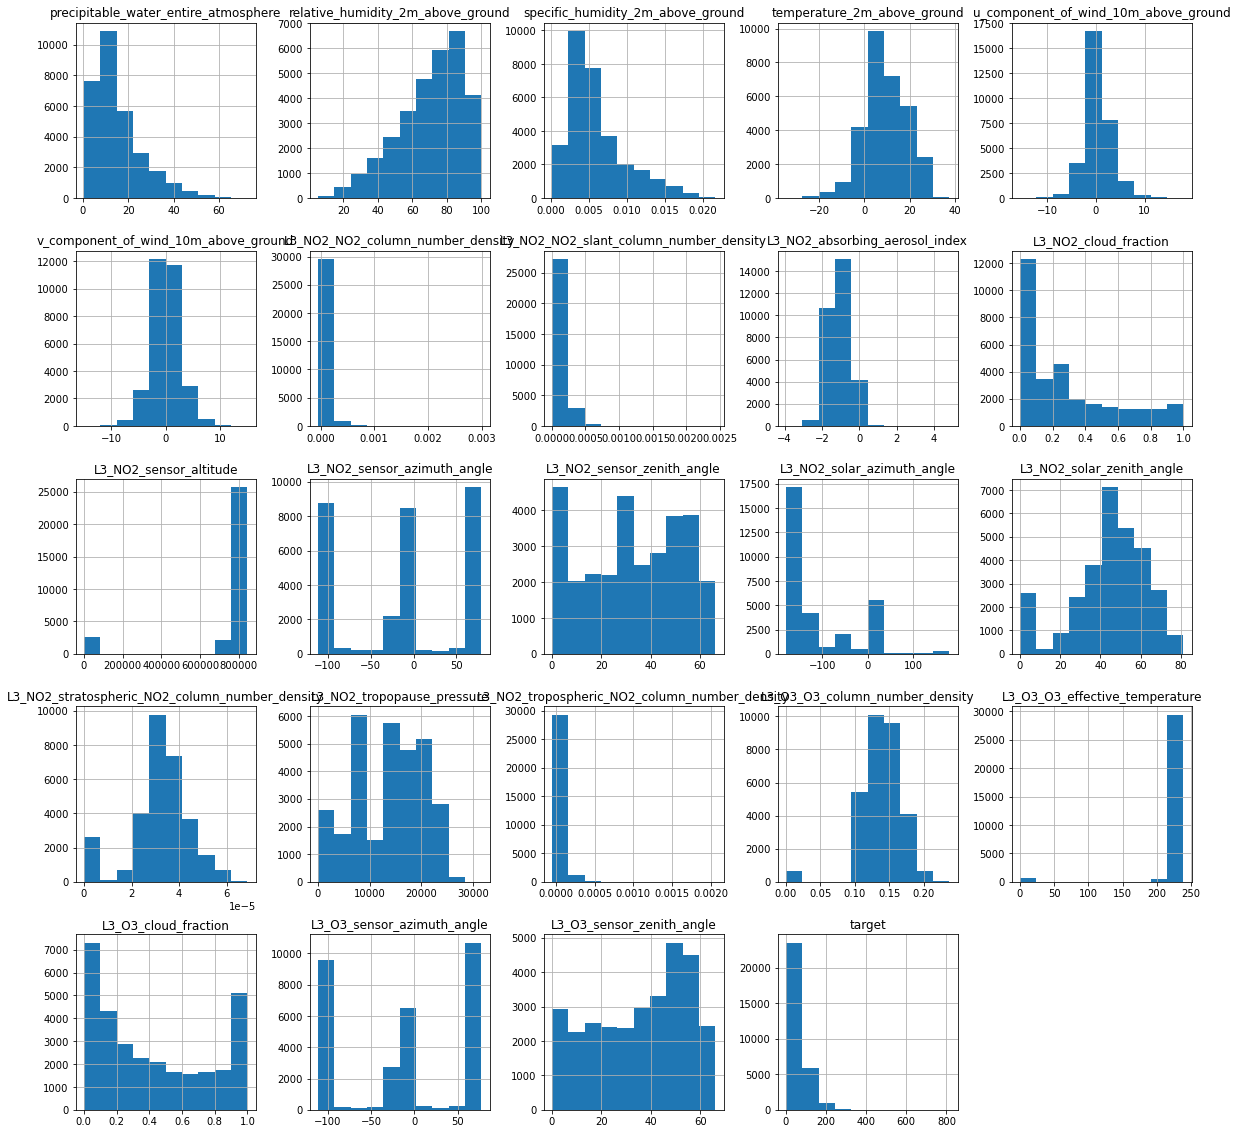

In [100]:
train_1.hist(figsize=(20,20));

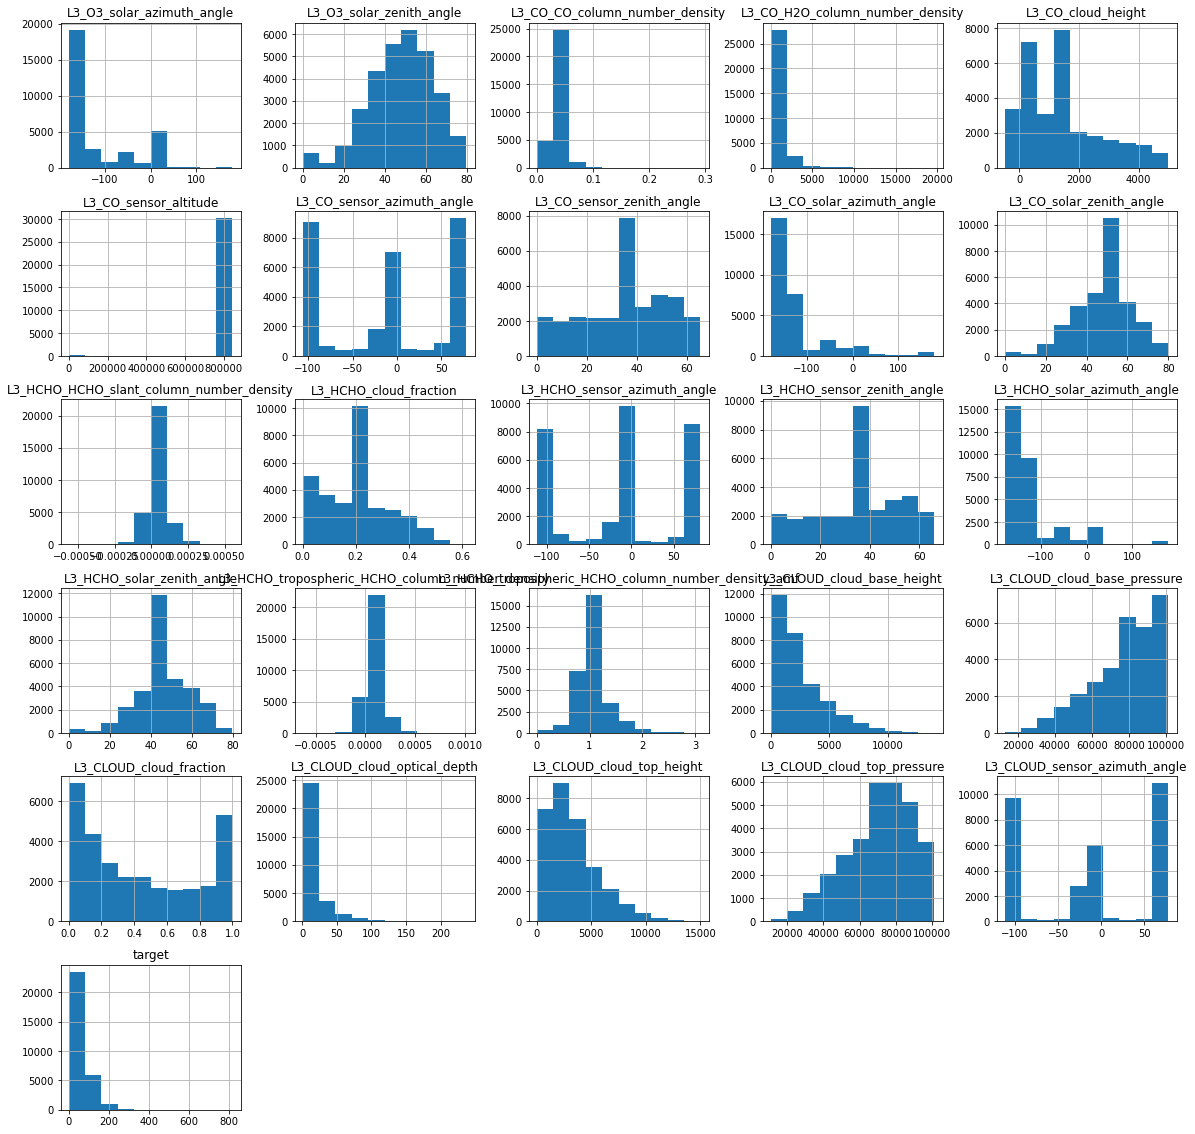

In [101]:
train_2.hist(figsize=(20,20));

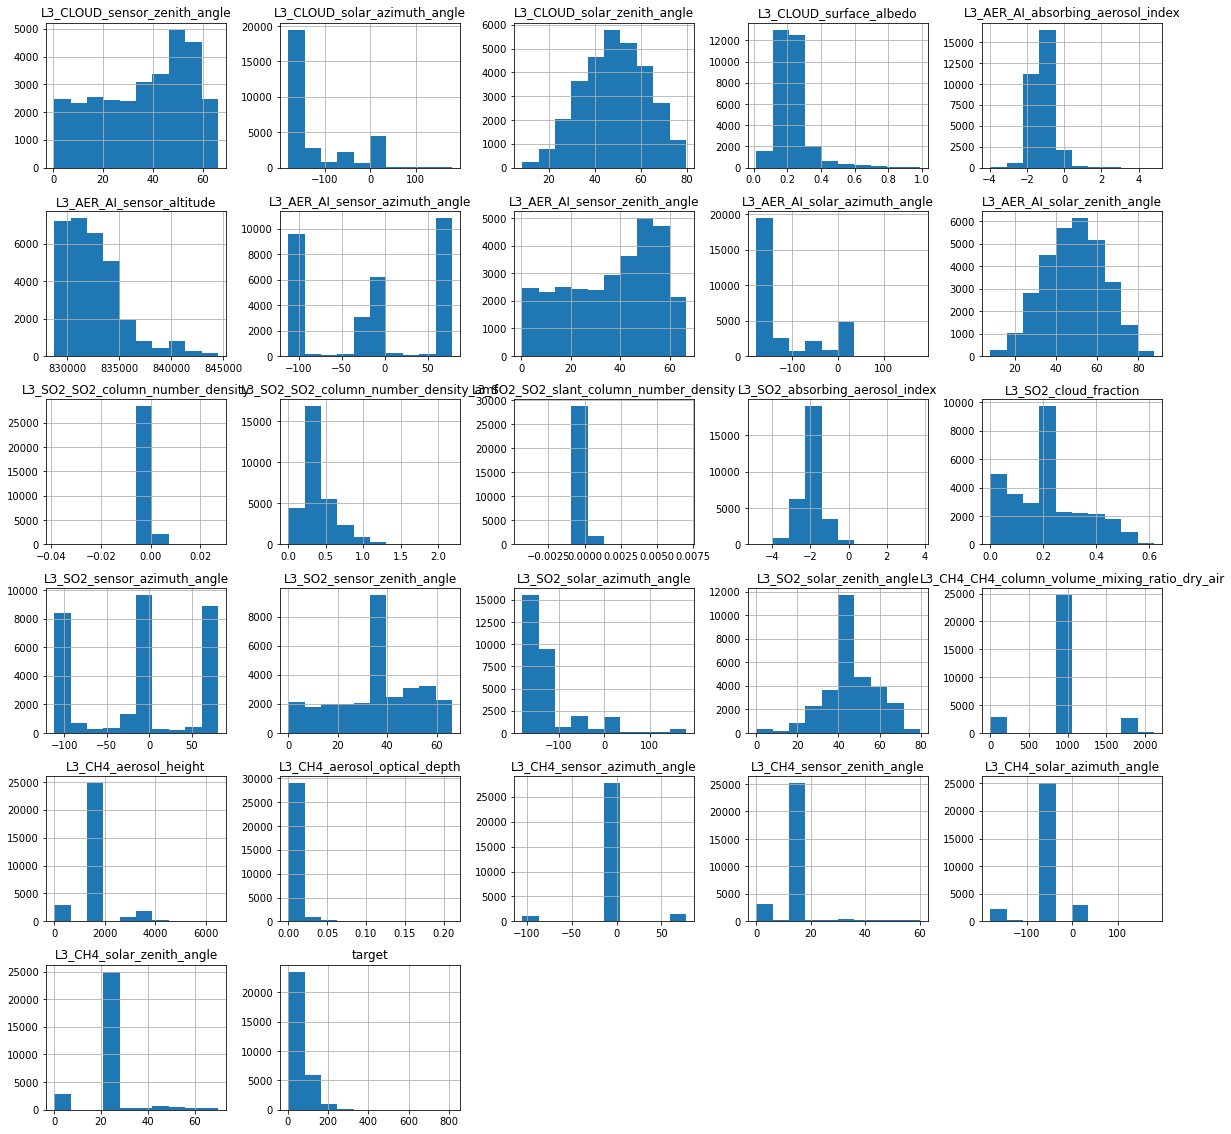

In [102]:
train_3.hist(figsize=(20,20));

Quickly, let's do a correation plot and examine any linear relationship between features.

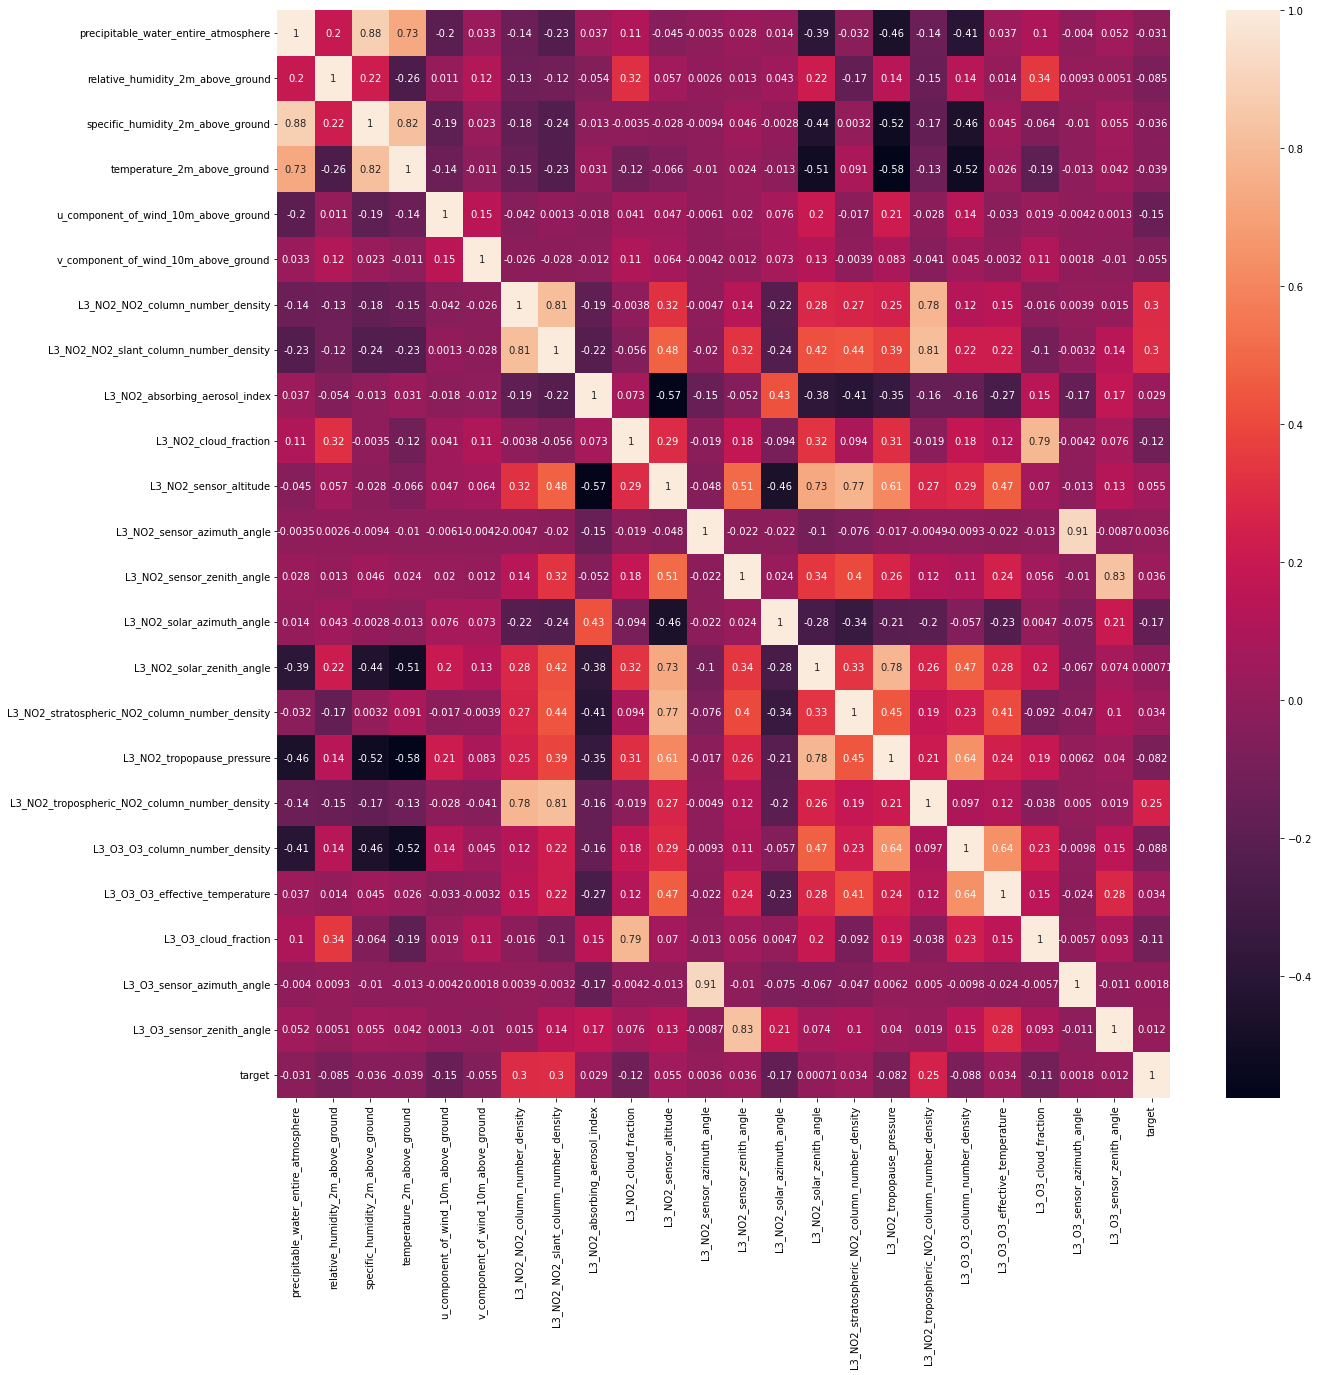

In [103]:

plt.figure(figsize=(20,20))
sns.heatmap(train_1.corr(), annot=True);

From what is seen from this heatmap/correlation plot using the first training set, it can be observed that the following columns have positive linear relationship with the target variable.
1. L3_O3_O3_effective_temperature
2. L3_NO2_tropospheric_NO2_column_number_density
3. L3_NO2_stratospheric_NO2_column_number_density
4. L3_NO2_sensor_zenith_angle
5. L3_NO2_sensor_altitude
6. L3_NO2_absorbing_aerosol_index
7. L3_NO2_NO2_slant_column_number_density
8. L3_NO2_NO2_column_number_density

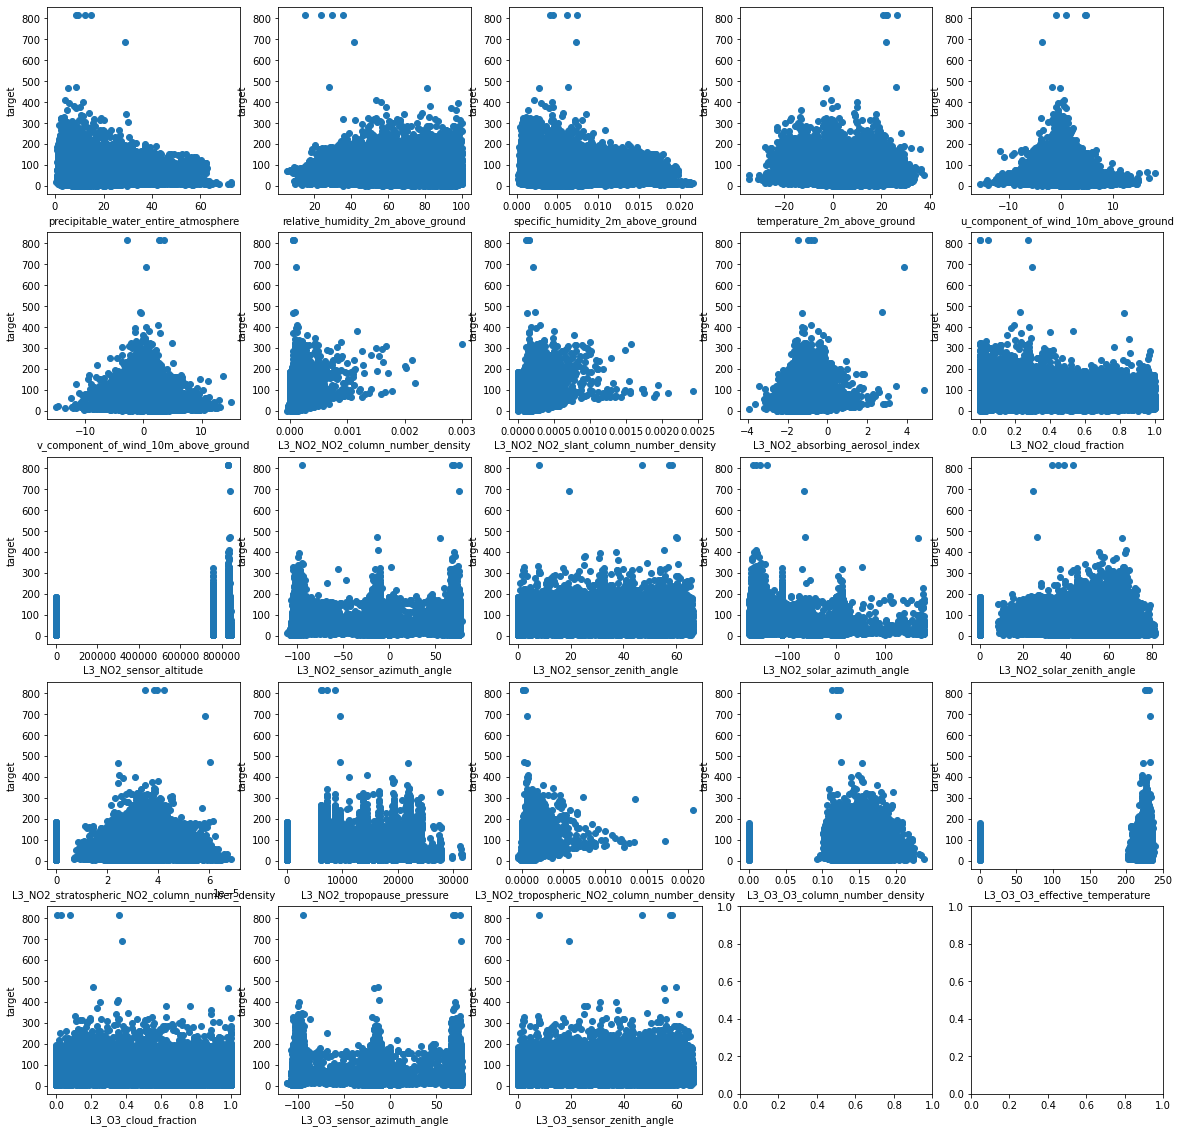

In [104]:
# use for loop to plot all columns at once.

plt.subplots(5,5, figsize=(20,20))
for i, col in enumerate(train_1):
    if col != 'target':
        plt.subplot(5,5,i+1)
        plt.scatter(x=train_1[col], y=train_1['target'])
        plt.xlabel(col)
        plt.ylabel('target')
        
        
plt.show()


In [105]:
features_1 = train_1[['L3_O3_O3_effective_temperature',
'L3_NO2_tropospheric_NO2_column_number_density',
'L3_NO2_stratospheric_NO2_column_number_density',
'L3_NO2_sensor_zenith_angle',
'L3_NO2_sensor_altitude',
'L3_NO2_absorbing_aerosol_index',
'L3_NO2_NO2_slant_column_number_density',
'L3_NO2_NO2_column_number_density']]

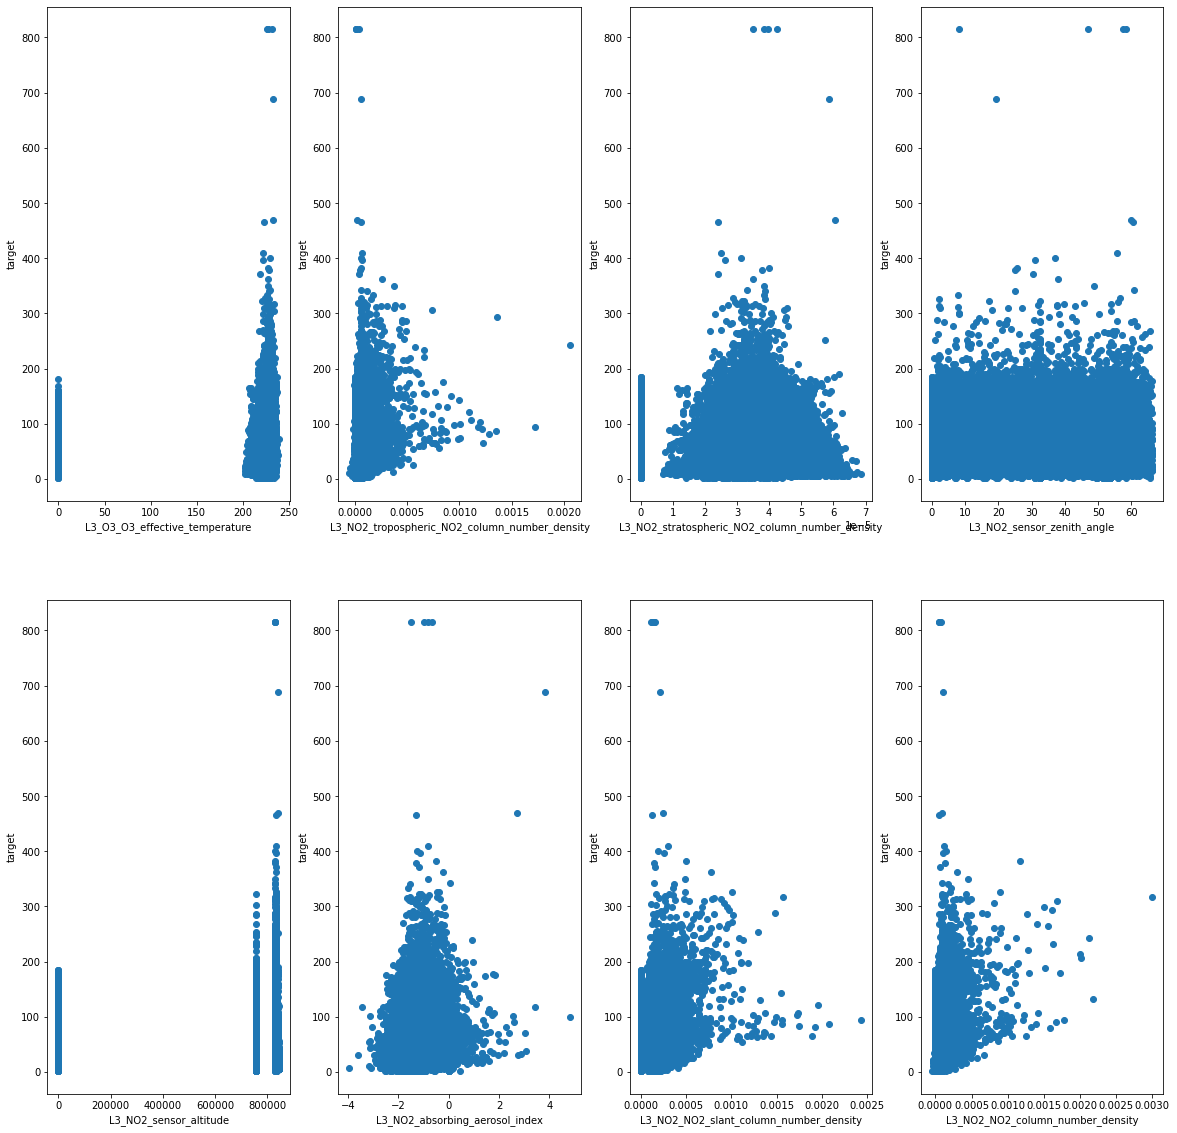

In [106]:
# visualizing the features_1 and the output variable

plt.subplots(2,4, figsize=(20,20))
for i, col in enumerate(features_1):
    if col != 'target':
        
        plt.subplot(2,4,i+1)
        plt.scatter(x=features_1[col], y=train_1['target'])
        plt.xlabel(col)
        plt.ylabel('target')
        
        
plt.show()

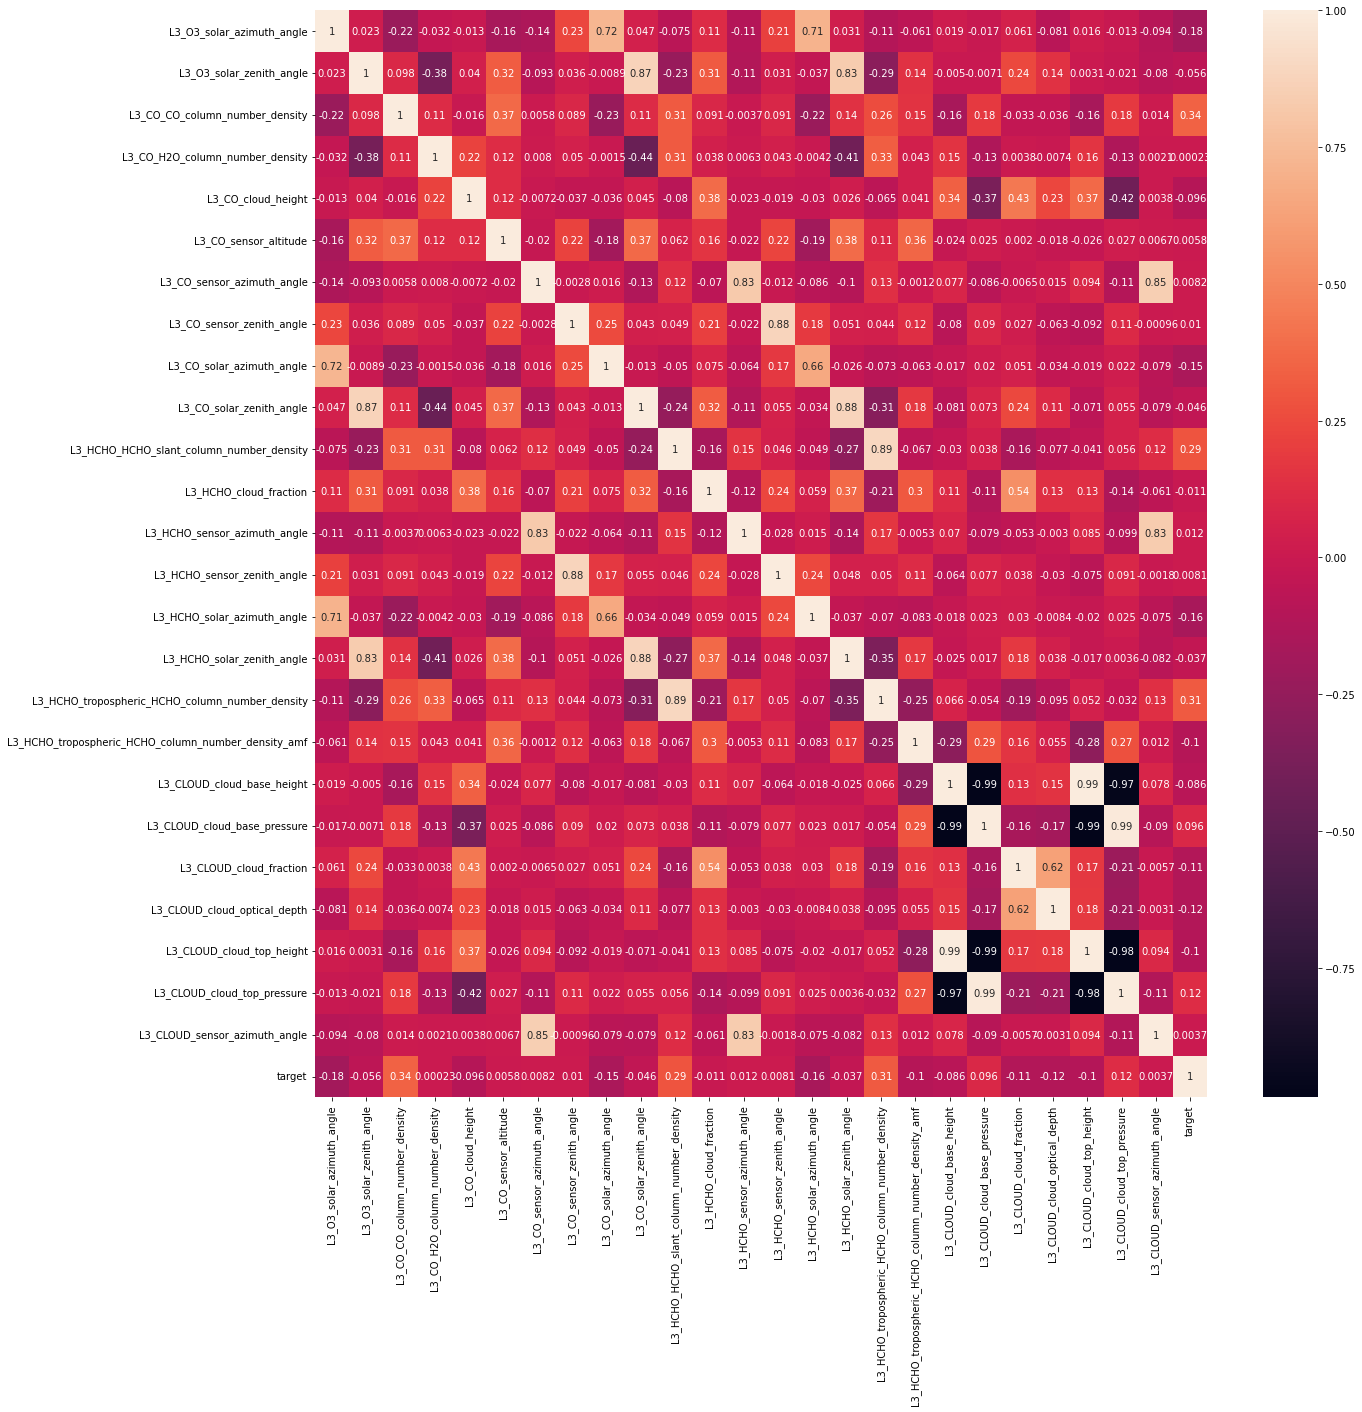

In [107]:
# get the correlation heatmap of train_2

plt.figure(figsize=(20,20))
sns.heatmap(train_2.corr(), annot=True);


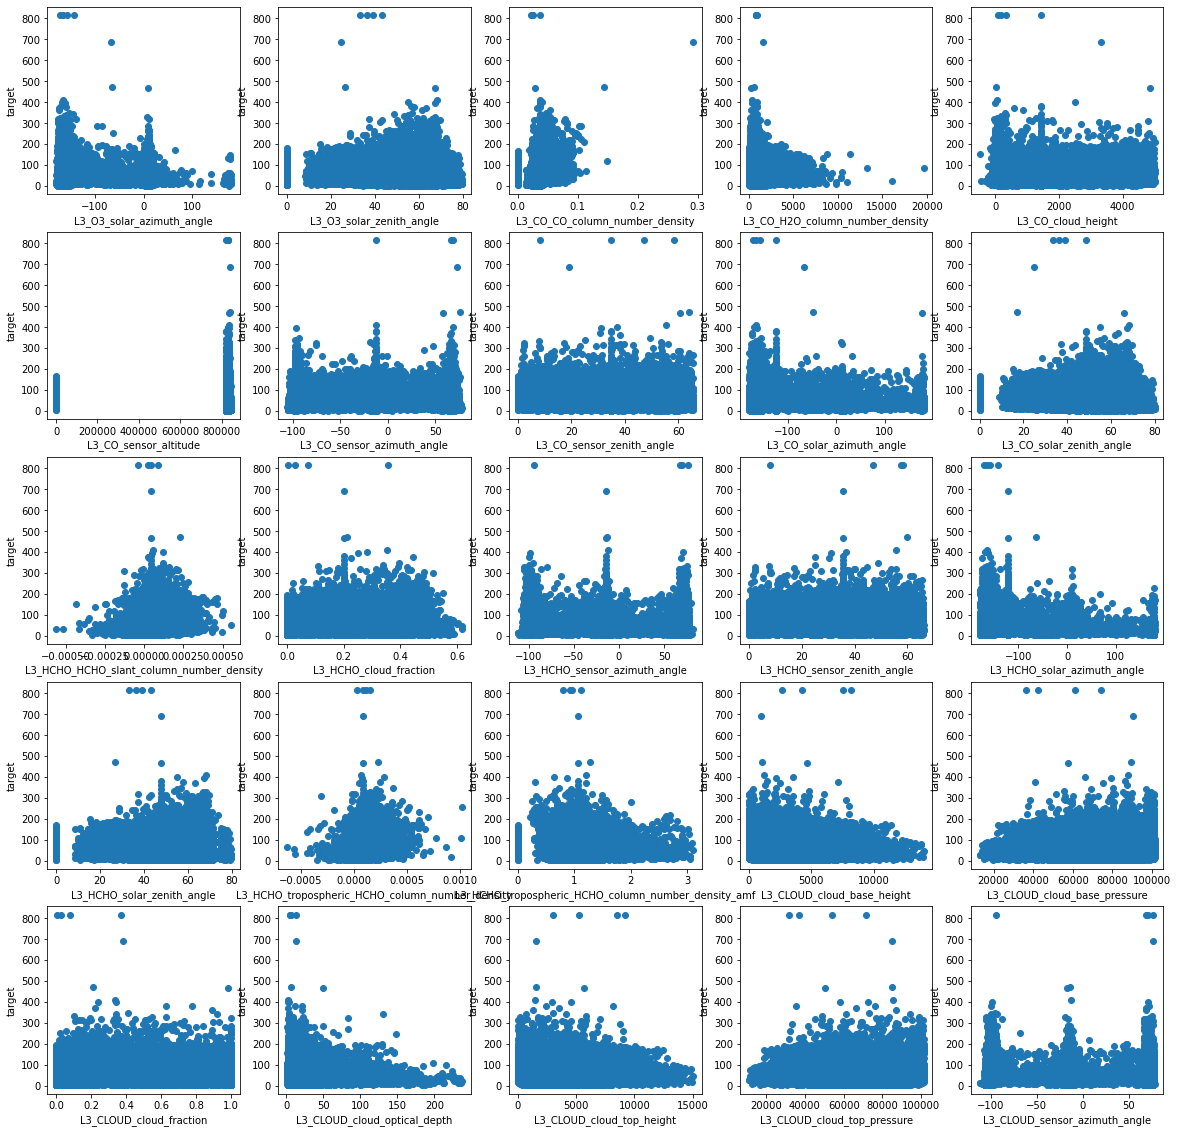

In [108]:
# visualize the relationship between feature variables and the target variable

plt.subplots(5,5, figsize=(20,20))
for i, col in enumerate(train_2):
    if col != 'target':
        
        plt.subplot(5,5,i+1)
        plt.scatter(x=train_2[col], y=train_2['target'])
        plt.xlabel(col)
        plt.ylabel('target')
        
        
plt.show()


In [109]:
features_2 = train_2[[
    'L3_CO_CO_column_number_density', 
    'L3_CO_sensor_zenith_angle',
    'L3_HCHO_HCHO_slant_column_number_density',
    'L3_HCHO_sensor_azimuth_angle',
    'L3_HCHO_tropospheric_HCHO_column_number_density',
    'L3_CLOUD_cloud_base_pressure',
    'L3_CLOUD_cloud_top_pressure'
]]

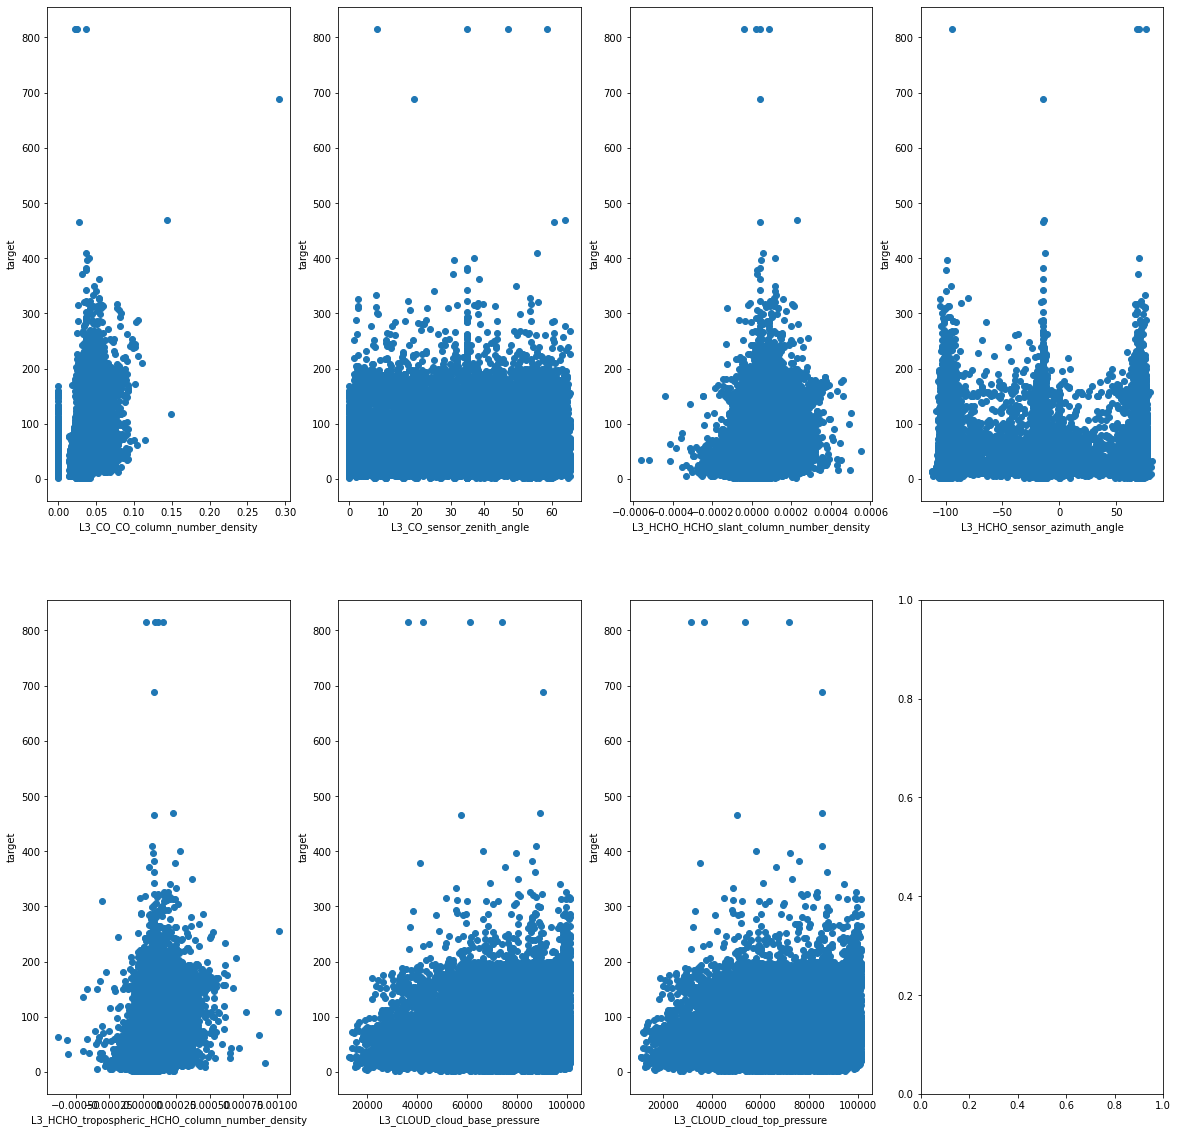

In [110]:
# visualizing the features_2 and the output variables

plt.subplots(2,4, figsize=(20,20))
for i, col in enumerate(features_2):
    plt.subplot(2,4,i+1)
    plt.scatter(x=features_2[col], y=train_2['target'])
    plt.xlabel(col)
    plt.ylabel('target')
    
        
plt.show()

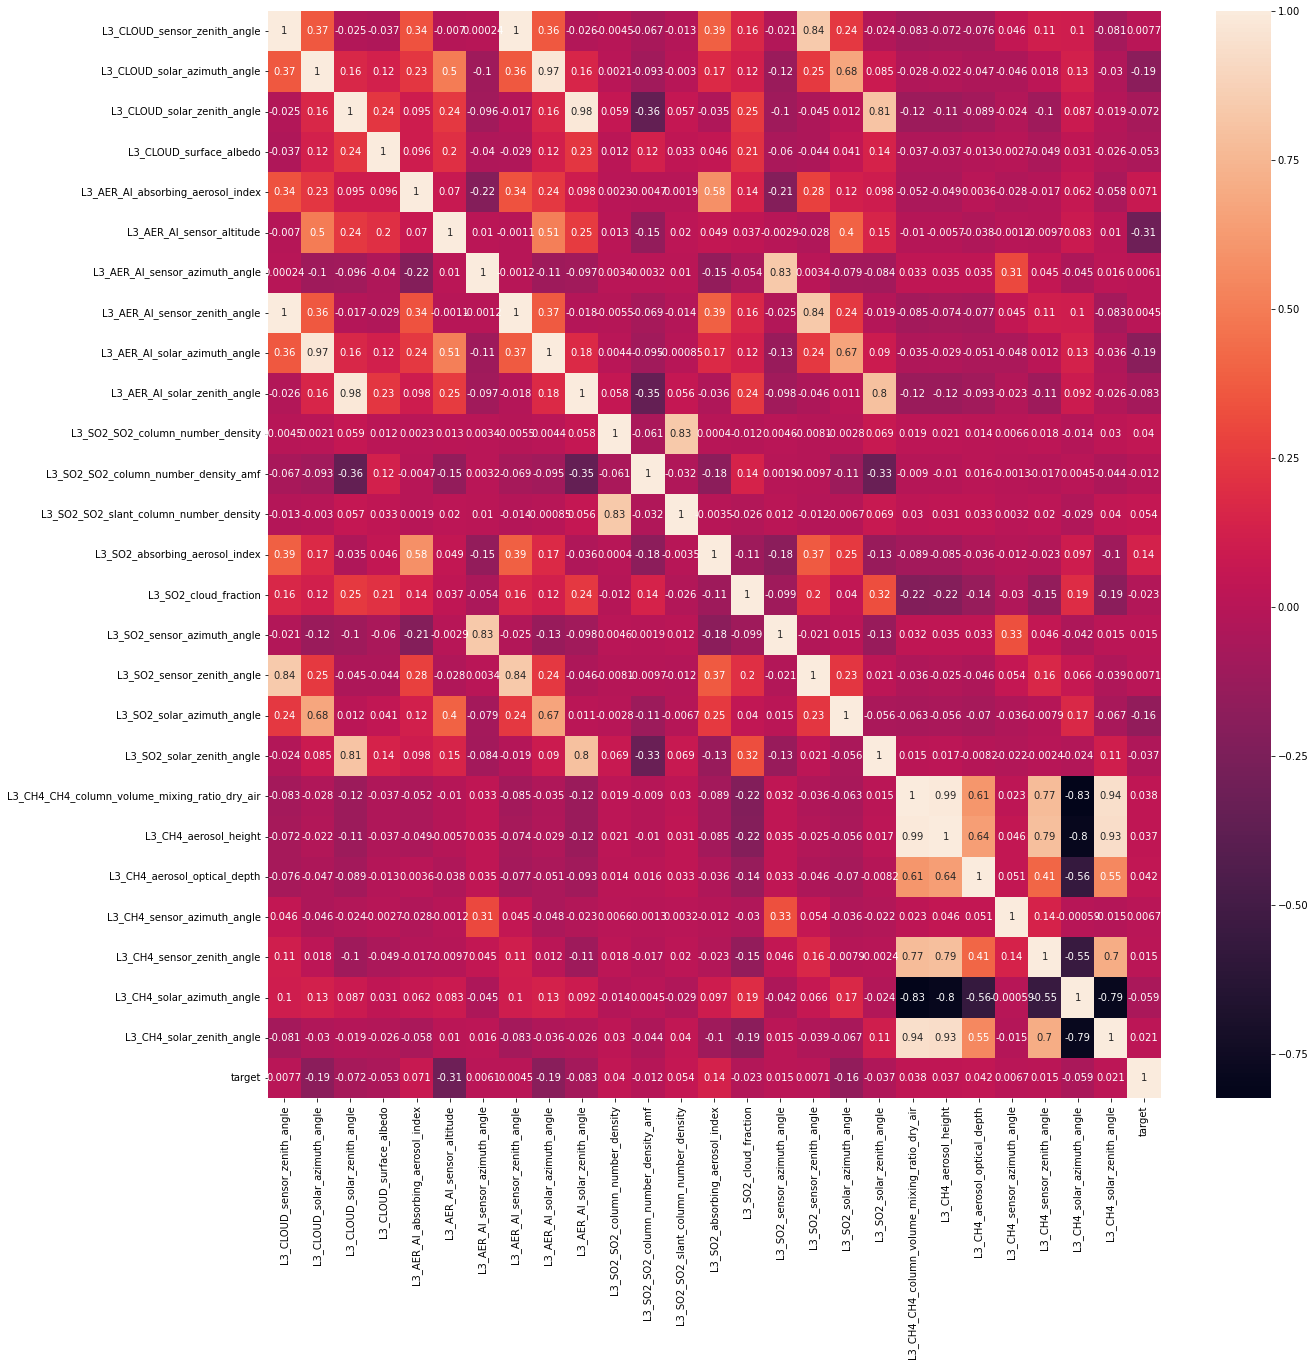

In [111]:
# inspecting the correlation between the third train set and the output variable..

plt.figure(figsize=(20,20))
sns.heatmap(train_3.corr(), annot=True);


In [112]:
train_3.columns

Index(['L3_CLOUD_sensor_zenith_angle', 'L3_CLOUD_solar_azimuth_angle',
       'L3_CLOUD_solar_zenith_angle', 'L3_CLOUD_surface_albedo',
       'L3_AER_AI_absorbing_aerosol_index', 'L3_AER_AI_sensor_altitude',
       'L3_AER_AI_sensor_azimuth_angle', 'L3_AER_AI_sensor_zenith_angle',
       'L3_AER_AI_solar_azimuth_angle', 'L3_AER_AI_solar_zenith_angle',
       'L3_SO2_SO2_column_number_density',
       'L3_SO2_SO2_column_number_density_amf',
       'L3_SO2_SO2_slant_column_number_density',
       'L3_SO2_absorbing_aerosol_index', 'L3_SO2_cloud_fraction',
       'L3_SO2_sensor_azimuth_angle', 'L3_SO2_sensor_zenith_angle',
       'L3_SO2_solar_azimuth_angle', 'L3_SO2_solar_zenith_angle',
       'L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
       'L3_CH4_aerosol_height', 'L3_CH4_aerosol_optical_depth',
       'L3_CH4_sensor_azimuth_angle', 'L3_CH4_sensor_zenith_angle',
       'L3_CH4_solar_azimuth_angle', 'L3_CH4_solar_zenith_angle', 'target'],
      dtype='object')

> The following columns have some correlation with our output variable which is 'target'

1. 'L3_AER_AI_absorbing_aerosol_index', 'L3_SO2_SO2_column_number_density', 'L3_SO2_SO2_slant_column_number_density', 'L3_SO2_absorbing_aerosol_index', 'L3_SO2_sensor_azimuth_angle', 'L3_CH4_CH4_column_volume_mixing_ratio_dry_air', 'L3_CH4_aerosol_height', 'L3_CH4_aerosol_optical_depth', 'L3_CH4_sensor_zenith_angle', 'L3_CH4_solar_zenith_angle'


In [113]:
features_3 = train_3[[
    'L3_AER_AI_absorbing_aerosol_index', 
    'L3_SO2_SO2_column_number_density', 
    'L3_SO2_SO2_slant_column_number_density',
    'L3_SO2_absorbing_aerosol_index', 
    'L3_SO2_sensor_azimuth_angle',
    'L3_CH4_CH4_column_volume_mixing_ratio_dry_air', 
    'L3_CH4_aerosol_height', 
    'L3_CH4_aerosol_optical_depth', 
    'L3_CH4_sensor_zenith_angle', 
    'L3_CH4_solar_zenith_angle'
]]

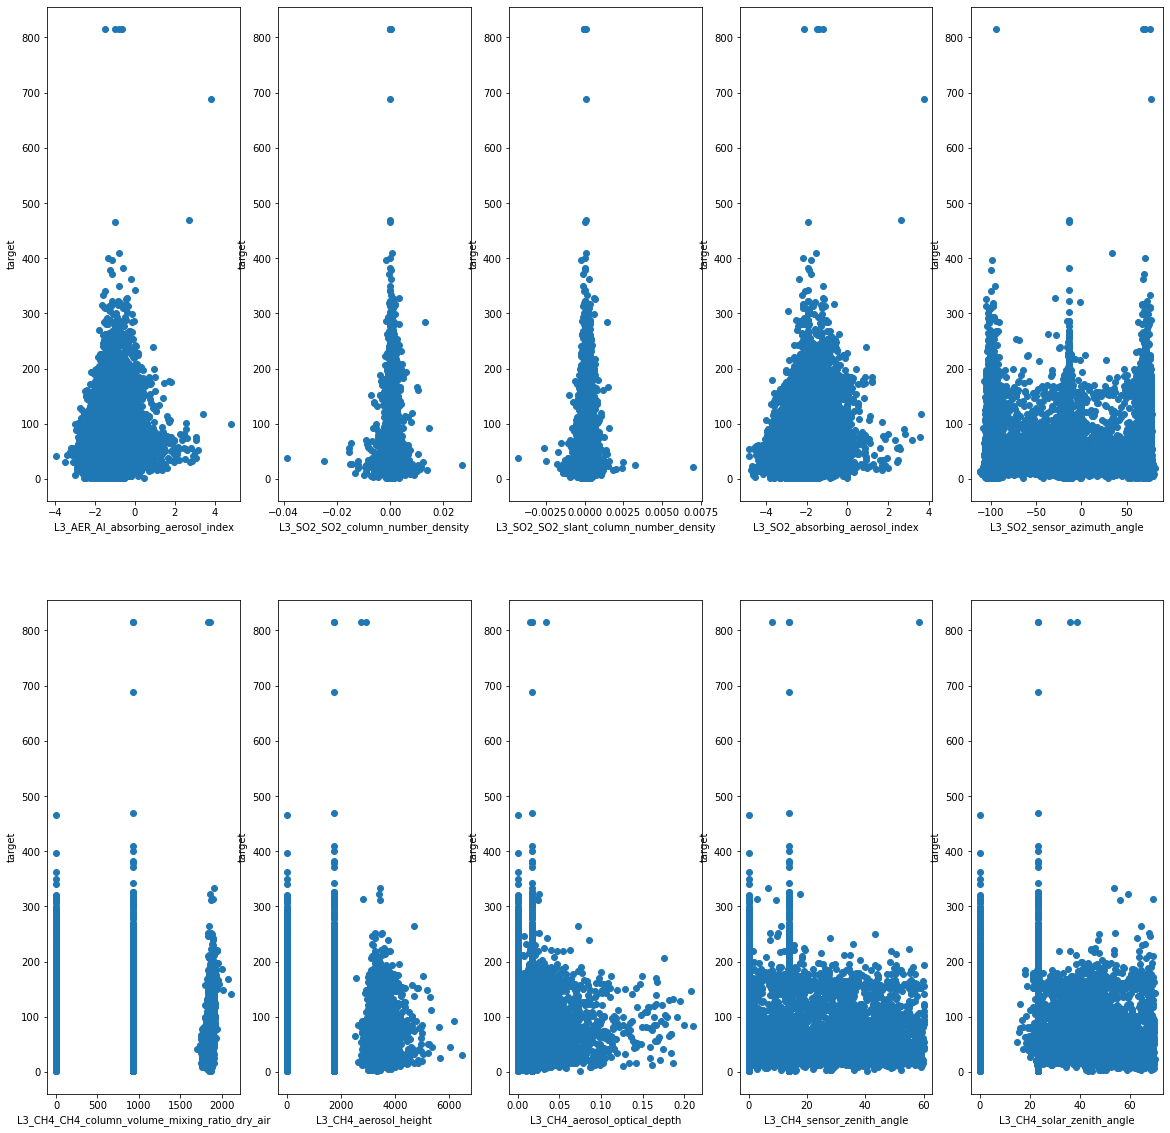

In [114]:
# visualize correlation between features_3 and the output..

plt.subplots(2,5, figsize=(20,20))
for i, col in enumerate(features_3):
    plt.subplot(2,5,i+1)
    plt.scatter(x=features_3[col], y=train_3['target'])
    plt.xlabel(col)
    plt.ylabel('target')
    
        
plt.show()

In [115]:
# let's combine all the features we've selected from the three training sets..

train_features = pd.concat([features_1,features_2, features_3], axis=1)

In [116]:
test_set = test[list(train_features)]

### Model selection and training


In [117]:
# first model is the linear models 

lin_model = LinearRegression().fit(train_features, output)

In [118]:
# lin_model.score(train_features, output)

preds = lin_model.predict(test_set)

preds

array([58.66172909, 40.49659999, 36.49174772, ..., 32.70214804,
       46.69695055, 66.09976539])

In [119]:
sample_sub = pd.read_csv('SampleSubmission.csv')


In [120]:
sample_sub.shape, df_test.shape

((16136, 2), (16136, 76))

In [121]:
assert df_test['Place_ID X Date'].values in sample_sub['Place_ID X Date'].values

In [122]:
df_test['Place_ID X Date'].head()

Date
2020-01-02    0OS9LVX X 2020-01-02
2020-01-03    0OS9LVX X 2020-01-03
2020-01-04    0OS9LVX X 2020-01-04
2020-01-05    0OS9LVX X 2020-01-05
2020-01-06    0OS9LVX X 2020-01-06
Name: Place_ID X Date, dtype: object

In [123]:
sample_sub['Place_ID X Date'].head()

0    0OS9LVX X 2020-01-02
1    0OS9LVX X 2020-01-03
2    0OS9LVX X 2020-01-04
3    0OS9LVX X 2020-01-05
4    0OS9LVX X 2020-01-06
Name: Place_ID X Date, dtype: object

In [124]:
# use the place and date in the df_test to create a sample submission file.

submission_file = pd.DataFrame({'Place_ID X Date':df_test['Place_ID X Date'].values, 'target':preds})

In [125]:
submission_file.head()

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,58.661729
1,0OS9LVX X 2020-01-03,40.496600
2,0OS9LVX X 2020-01-04,36.491748
3,0OS9LVX X 2020-01-05,41.621635
4,0OS9LVX X 2020-01-06,46.035973


In [126]:
submission_file.tail()

,Place_ID X Date,target
16131,ZZDJZMS X 2020-03-31,35.737523
16132,ZZDJZMS X 2020-04-01,46.051425
16133,ZZDJZMS X 2020-04-02,32.702148
16134,ZZDJZMS X 2020-04-03,46.696951
16135,ZZDJZMS X 2020-04-04,66.099765


In [127]:
submission_file.to_csv('linearRegression_submission.csv')

In [128]:
# from pandas import DataFrame


def models(model_names, features, target, testing):
    
    for model in model_names:
        model_training = model.fit(features,target)
        predictions = model.predict(testing[list(features)])
        
        submission_file = pd.DataFrame({'Place_ID X Date':testing['Place_ID X Date'].values, 'target':predictions}).to_csv(f'{model}_submission.csv'.replace('()',''), index=False)

    return submission_file

In [129]:
# create objects of various algorithms and perform hyperparameter tunning if needed

random_forest = RandomForestRegressor()
ridge_regr = Ridge()
lasso_regr = Lasso()
svm_r = SVR()
decision_tree = DecisionTreeRegressor()
gradient_boosting = GradientBoostingRegressor()

In [130]:
models([decision_tree, random_forest, ridge_regr,lasso_regr, svm_r, gradient_boosting], train_features, output, test)